In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.11-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.11-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.11-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redir

In [0]:
# Setting up the directory working folder
!mkdir drive
!google-drive-ocamlfuse drive
!ls 'drive/Colab Notebooks'

 classification_of_apparels_using_pretrained_models
 multi_label_classification
'Multi Label Classification of Apparels using CNN.ipynb'
'Regional classification of apparels using CNN.ipynb'


In [0]:
import os
os.chdir('drive/Colab Notebooks')
os.getcwd()

'/content/drive/Colab Notebooks'

In [0]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [0]:
df=pd.read_csv("multi_label_classification/labels.csv")

columns=['Beige', 'Black', 'Blue', 'Brown', 'Gold', 'Green', 'Grey', 'Indigo', 'Ivory', 'Khaki', 'Linen', 
         'Navy', 'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'Tan', 'White', 'Yellow', 'DRESSES', 
         'JACKETS AND COATS', 'JEANS', 'JUMPSUITS', 'LINGERIE', 'PANTS', 'SHIRTS', 'SHORTS', 'SKIRTS', 
         'SUITS AND BLAZERS', 'SWEATERS', 'SWIMWEAR', 'TOPS', 'UNDERWEAR AND LOUNGEWEAR', 'Men', 'Women']

datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=datagen.flow_from_dataframe(
dataframe=df[:13000],
directory="multi_label_classification/images",
x_col="File",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(256,256))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[13000:14500],
directory="multi_label_classification/images",
x_col="File",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(256,256))

test_generator=test_datagen.flow_from_dataframe(
dataframe=df[14500:],
directory="multi_label_classification/images",
x_col="File",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(256,256))

Found 13000 validated image filenames.
Found 1500 validated image filenames.
Found 1501 validated image filenames.


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='sigmoid'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# For creating model checkpoint
from keras.callbacks import ModelCheckpoint
filepath = 'multi_label_classification/checkpoint/'
checkpoint = ModelCheckpoint(filepath, monitor=['val_acc'], verbose=1, mode='max')
callbacks = [checkpoint]

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5
)

Epoch 1/5
406/406 [==============================] - 9260s 23s/step - loss: 0.1869 - acc: 0.9309 - val_loss: 0.1514 - val_acc: 0.9488
Epoch 2/5
406/406 [==============================] - 5769s 14s/step - loss: 0.1324 - acc: 0.9502 - val_loss: 0.1315 - val_acc: 0.9532
Epoch 3/5
406/406 [==============================] - 5757s 14s/step - loss: 0.1169 - acc: 0.9557 - val_loss: 0.1172 - val_acc: 0.9545
Epoch 4/5
406/406 [==============================] - 5771s 14s/step - loss: 0.1074 - acc: 0.9592 - val_loss: 0.1126 - val_acc: 0.9572
Epoch 5/5
406/406 [==============================] - 5747s 14s/step - loss: 0.1006 - acc: 0.9620 - val_loss: 0.1068 - val_acc: 0.9598


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 127, 127, 64)     

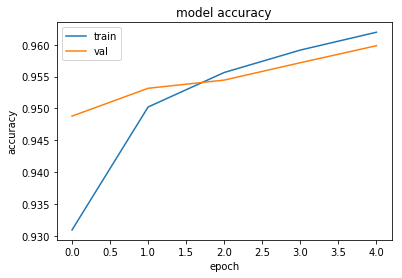

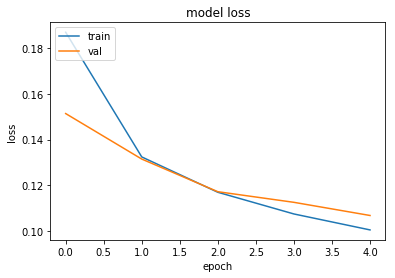

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

# Plot the training and validation loss + accuracy
def plot_training(history):
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.savefig('multi_label_classification/acc_vs_epochs.png')

plot_training(history)

In [0]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred > 0.5)
predictions = pred_bool.astype(int)
columns=['Beige', 'Black', 'Blue', 'Brown', 'Gold', 'Green', 'Grey', 'Indigo', 'Ivory', 'Khaki', 'Linen', 
         'Navy', 'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'Tan', 'White', 'Yellow', 'DRESSES', 
         'JACKETS AND COATS', 'JEANS', 'JUMPSUITS', 'LINGERIE', 'PANTS', 'SHIRTS', 'SHORTS', 'SKIRTS', 
         'SUITS AND BLAZERS', 'SWEATERS', 'SWIMWEAR', 'TOPS', 'UNDERWEAR AND LOUNGEWEAR', 'Men', 'Women']
#columns should be the same order of y_col

results=pd.DataFrame(predictions, columns=columns)
results["File"]=test_generator.filenames
ordered_cols=["File"]+columns
results=results[ordered_cols]#To get the same column order

results.to_csv("multi_label_classification/results.csv",index=False)

1501/1501 [==============================] - 984s 656ms/step
